<a href="https://colab.research.google.com/github/ejkiwi/mogumogu/blob/main/mgmg1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#cnn

In [1]:
import torch #pytorch 가져오기

In [2]:
#데이터셋불러오고 텐서로 바꿔주기
from torchvision import datasets #데이터셋 불러오고
from torchvision.transforms import ToTensor #텐서로 바꿔주기

#datasets에서 MNIST 가져와서 훈련데이터와 테스트데이터 가져와주기.
#datasets.MNIST(root - 데이터가 저장될 경로, train - train이 true 이면 train data이고 false면 test data, download - 데이터 없으면 인터넷에서 다운로드해줌 , transform - transform을 ToTensor로 지정해주지 않으면 텐서의 형식이 아닌, PIL이미지로 데이터가 가져와지게 된다, target_transform)

train_data = datasets.MNIST(
    root = "data",
    train = True, #train data를 다운로드
    transform = ToTensor(),
    download = True
)
test_data = datasets.MNIST(
    root = 'data',
    train = False, #test data를 다운로드
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14406787.08it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 365962.23it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1630598.82it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4440682.70it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
#학습데이터 확인
print(train_data)
print(train_data.data.size())
# 데이터셋의 이름은 MNIST
# 데이터의 수는 60000개
# 훈련데이터
# StandardTransform(데이터셋에 일관되게 적용되는 변환의 표준을 정의) -> Transform: ToTensor() #이미지 데이터들을 모두 일관되게 텐서 형태로 변환하겠다는 것을 의미.

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])


In [4]:
#테스트데이터 확인
print(test_data)
print(test_data.data.size())
#데이터의 수가 10000 인 것과 테스트데이터라는 것을 제외하면 나머지 속성은 학습데이터와 동일함.

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([10000, 28, 28])


<function matplotlib.pyplot.show(close=None, block=None)>

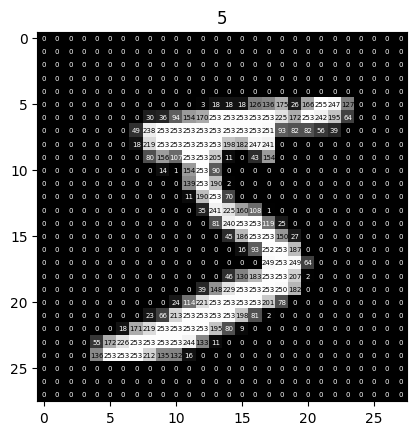

In [5]:
#데이터 시각적으로 확인
import matplotlib.pyplot as plt #시각적 확인을 위해 matplotlib을 사용.
fig, ax = plt.subplots() # fig -> 데이터가 담기는 프레임 / ax -> 실제 데이터가 그려지는 캔버스
ax.imshow(train_data.data[0], cmap='gray') #데이터의 모습

#이미지 위에 각 픽셀 값을 표시해서 나타내보기
for i in range(train_data.data[0].shape[0]): # i와j는 텍스트를 표시할 위치를 지정하기 위함.
  for j in range(train_data.data[0].shape[1]):
    c = 1 if train_data.data[0][i, j].item() < 125 else 0 # 이미지의 각 픽셀 값( train_data.data[0][i,j].item() )이 125보다 작으면 c = 1 흰색을 사용, 크면 c = 0 검정 사용.
    ax.text(j, i, str(train_data.data[0][i, j].item()), color=(c, c, c), ha='center', va='center', fontsize=5) # text()를 사용하여 이미지 위에 텍스트 그리기

plt.title("%i" % train_data.targets[0])
plt.show

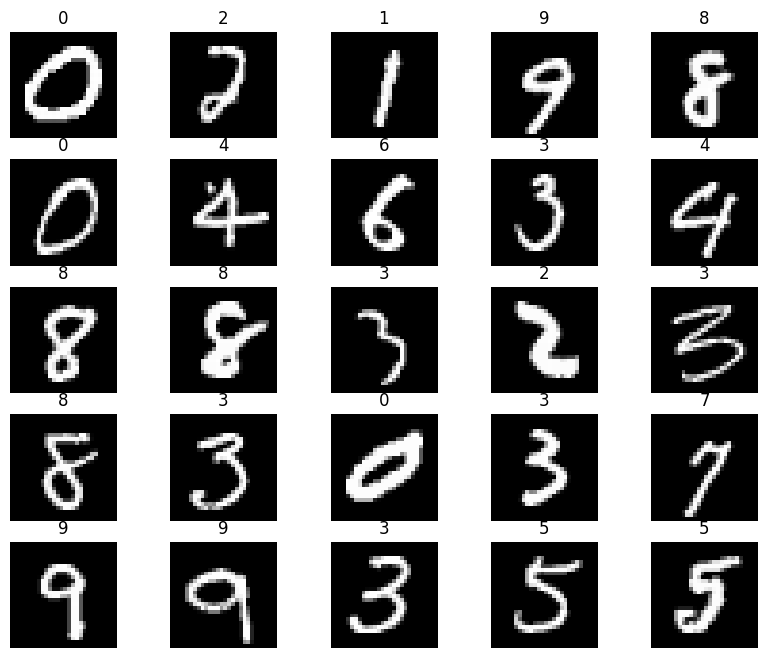

In [6]:
#랜덤으로 데이터 뽑아서 확인
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label= train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'test' : torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7deeefa15f00>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7deeefa16290>}

In [8]:
class CNN(torch.nn.Module):

  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2), #컨볼루션 레이어(합성곱층) #1차원 데이터를 받아 16개의 feature로 나누겟다!!임.
        torch.nn.ReLU(), #ReLU층
        torch.nn.MaxPool2d(kernel_size=2, stride=2)) #풀링층
    self.layer2 = torch.nn.Sequential(
        torch.nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2, stride=2))
    self.fc = torch.nn.Linear(32 * 7 * 7, 10, bias=True) #32*7*7만큼의 입력을 linear레이어에 의해 계산되게 해서... 10개의 출력이 나오도록 함.
    torch.nn.init.xavier_uniform_(self.fc.weight)
    # __init__에서 정의내린 레이어들을
    # 아래 forward(얘가 실제적인 모델의 형태가 됨)에서 사용한다.

  def forward(self, x): #순전파
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc(out)
    return out

In [9]:
model = CNN()
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [10]:
learning_rate = 0.01
loss_func = torch.nn.CrossEntropyLoss()
optimizer =  torch.optim.Adam(model.parameters(), lr=learning_rate)
training_epochs = 5

In [11]:
total_batch = len(loaders['train'])
for epoch in range(training_epochs):
    avg_cost = 0
    correct = 0
    total = 0

    for X, Y in loaders['train']:
        optimizer.zero_grad()
        pred = model(X)  # 순전파
        cost = loss_func(pred, Y)  # 손실 함수 계산
        cost.backward()  # 역전파
        optimizer.step()

        avg_cost += cost / total_batch

        # 정확도 계산
        _, predicted = torch.max(pred, 1)  # 예측한 클래스
        total += Y.size(0)  # 총 라벨 수
        correct += (predicted == Y).sum().item()  # 맞춘 예측 수

    accuracy = 100 * correct / total  # 정확도 계산
    print('[Epoch: {:>4}] cost = {:>.9}, accuracy = {:.2f}%'.format(epoch + 1, avg_cost, accuracy))

print('Learning Finished....>_<')

[Epoch:    1] cost = 0.185288757, accuracy = 94.10%
[Epoch:    2] cost = 0.0643409714, accuracy = 98.03%
[Epoch:    3] cost = 0.0574887842, accuracy = 98.25%
[Epoch:    4] cost = 0.0518945567, accuracy = 98.37%
[Epoch:    5] cost = 0.0480846092, accuracy = 98.53%
[Epoch:    6] cost = 0.0455344543, accuracy = 98.60%
[Epoch:    7] cost = 0.0429254323, accuracy = 98.64%
[Epoch:    8] cost = 0.0441515334, accuracy = 98.62%
[Epoch:    9] cost = 0.043495059, accuracy = 98.68%
[Epoch:   10] cost = 0.0433634371, accuracy = 98.75%
Learning Finished....>_<


#resnet

In [13]:
#필요한 모듈 불러오기
import torch
import torch.nn as nn #다양한 종류의 레이어 제공 -> 모델 만들기 도우미!
import torch.nn.functional as F #활성화 함수, 손실함수 등을 함수 형태로 제공.
import torch.optim as optim
import os

In [14]:
#BasicBlock 클래스 정의

class BasicBlock(nn.Module): # nn.Module 상속받기
    def __init__(self, in_planes, planes, stride = 1):
        super(BasicBlock, self).__init__() #BasicBlock의 부모클래스인 nn.Module의 __init__함수를 먼저 호출해서 사용.

        #conv1과 conv2 설정
        #2D 컨볼루션 레이어 설정
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size = 3, stride = stride, padding = 1, bias = False) # in_planes 입력채널 수 / planes 출력채널 수 / kernel_size 3*3 필터(커널) 사용 / stride (커널로 훑을 때의 보폭) 기본값은 1 / padding 패딩의 크기 1 / bias = False 바이어스(출력값을 조절하기 위해 사용되는  값) 를 사용하지 않겠다. -> 바로 다음 줄의 코드(배치정규화)에서 바이어스의 역할을 해주기 때문에 여기에선 사용하지 않는다.
        #배치 정규화 설정
        self.bn1 = nn.BatchNorm2d(planes) # planes 배치정규화를 적용할 채널의 수. 앞의 출력 채널의 수와 동일해야함(당연함)

        #2D 컨볼루션 레이어 설정
        self.conv2 = nn.Conv2d(planes, planes, kernel_size = 3, stride = 1, padding = 1, bias = False)
        #배치 정규화 설정
        self.bn2 = nn.BatchNorm2d(planes)

# shortcut 설정 -> `H(x) = R(x) + x`에서의 x를 위한 작업
        self.shortcut = nn.Sequential() # nn.Sequential : pytorch에서 여러 레이어들을 순서대로 쌓을 때 사용하는 도구 # x를 그대로 더할 수 있는 경우
        if stride != 1: #stride의 값이 1인경우(입력과 출력의 채널 수가 다른 경우 = x를 그대로 더할 수 없는 경우)
          self.shortcut = nn.Sequential(
                          nn.Conv2d(in_planes, planes, kernel_size = 1, stride = stride, bias = False),
                          nn.BatchNorm2d(planes)
                      ) # nn.Sequential을 사용해서 Conv2d와 BatchNorm레이어들을 이어줬음

#순전파 함수 # __init__에서 설정해뒀던 거 실제로 사용하는 부분.
    def forward(self,x):
        out = F.relu(self.bn1(self.conv1(x))) #conv1 거치고, relu함수 거치기
        out = self.bn2(self.conv2(out)) #그다음 conv2 거치기
        out += self.shortcut(x) # resnet의 핵심인 skip connection : H(x) = R(x) + x
        return out

In [15]:
#ResNet 클래스 정의
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes = 10):
        super(ResNet, self).__init__() #ResNet의 부모클래스인 nn.Module의 __init__함수를 먼저 호출해서 사용.
        self.in_planes = 64 # 입력 채널 수 64        # 2D 컨볼루션레이어 설정

        self.conv1 = nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding = 1, bias = False) # 입력채널 수 3 / 출력채널 수 64 / kernel_size 3*3 필터(커널) 사용 / stride (커널로 훑을 때의 보폭) 1 / padding 패딩의 크기 1 / bias = False 바이어스(출력값을 조절하기 위해 사용되는  값) 를 사용하지 않겠다.
        # 배치정규화 설정
        self.bn1 = nn.BatchNorm2d(64) # 배치정규화를 위해 사용할 채널 수 = 이전 채널에서의 출력 채널 수 = 64        # 레이어블록 설정(각 블록은 앞서 정의한 BASIC BLOCK으로 구성될거임. 인자 block 자리에, BasicBlock이 들어갈거니까아아아~~)
        # _make_layer() : (블록의 종류, 출력 채널 수, 쌓을 블럭의 수, 레이어의 첫 블럭에서 사용할 stride의 값)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride = 1) #
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride = 2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride = 2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        # self._make_layer()에서 self는 현재 클래스의 인스턴스를 가리킴.
        # 클래스 예측값 계산
        self.linear = nn.Linear(512, num_classes) # 입력 채널 수 512, 출력 채널 수 num_classes        # _make_layer 함수 설정
    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks -1) # stride 값 설정 # 첫 번째 블록의 stride는 지정된 값을 사용하고 이후 블럭들은 stride = 1이 된다.
        layers = [] # 블럭을 담을 빈 리스트 생성
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride)) # 입력 채널 수 self.in_planes, 출력 채널 수 planes, 스트라이드 값 stride
            self.in_planes = planes # 채널 수 변경해주기(다음 레이어를 위해)
        return nn.Sequential(*layers) # 생성한 블록들을 하나의 레이어로 묶어서 반환.
    # 순전파 함수 # __init__ 설정해뒀던거랑 _make_layer 함수 만든 거 실제로 사용하는 부분.
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4) # 풀링층
        out = out.view(out.size(0),-1) # 텐서의 차원 변경
        out = self.linear(out) #완전 연결층
        return out

In [16]:
# ResNet 18 함수 정의
def ResNet18():
    return ResNet(BasicBlock, [2,2,2,2])

In [17]:
# 데이터 불러오기
import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:04<00:00, 41588920.60it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [18]:
# 학습 준비
device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = ResNet18()
net = net.to(device)


learning_rate = 0.1
file_name = 'resnet18_cifar10.pth'

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)


def train(epoch):
    print('\n[ Train epoch: %d ]' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)

        total += targets.size(0)
        current_correct = predicted.eq(targets).sum().item()
        correct += current_correct

        if batch_idx % 100 == 0:
            print('\nCurrent batch:', str(batch_idx))
            print('Current batch average train accuracy:', current_correct / targets.size(0))
            print('Current batch average train loss:', loss.item() / targets.size(0))

    print('\nTotal average train accuarcy:', correct / total)
    print('Total average train loss:', train_loss / total)


def test(epoch):
    print('\n[ Test epoch: %d ]' % epoch)
    net.eval()
    loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(test_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        total += targets.size(0)

        outputs = net(inputs)
        loss += criterion(outputs, targets).item()

        _, predicted = outputs.max(1)
        correct += predicted.eq(targets).sum().item()

    print('\nTotal average test accuarcy:', correct / total)
    print('Total average test loss:', loss / total)

    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print('Model Saved!')

In [20]:
import time

def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 50:
        lr /= 10
    if epoch >= 100:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

start_time = time.time()

for epoch in range(0, 10):
    adjust_learning_rate(optimizer, epoch)
    train(epoch)
    test(epoch)
    print('\nTime elapsed:', time.time() - start_time)


[ Train epoch: 0 ]

Current batch: 0
Current batch average train accuracy: 0.59375
Current batch average train loss: 0.008417416363954544

Current batch: 100
Current batch average train accuracy: 0.671875
Current batch average train loss: 0.007439257577061653

Current batch: 200
Current batch average train accuracy: 0.65625
Current batch average train loss: 0.007622913457453251

Current batch: 300
Current batch average train accuracy: 0.625
Current batch average train loss: 0.007603014819324017

Total average train accuarcy: 0.66338
Total average train loss: 0.007400191020965576

[ Test epoch: 0 ]

Total average test accuarcy: 0.6137
Total average test loss: 0.011425138068199158
Model Saved!

Time elapsed: 45.23142433166504

[ Train epoch: 1 ]

Current batch: 0
Current batch average train accuracy: 0.6953125
Current batch average train loss: 0.006833736319094896

Current batch: 100
Current batch average train accuracy: 0.6640625
Current batch average train loss: 0.007035151124000549

